# Inference with Attention
Using [Keras Visualization Toolkit](https://github.com/raghakot/keras-vis) based on [VGGNet](https://github.com/raghakot/keras-vis/blob/master/examples/vggnet/attention.ipynb) sample.

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.cm as cm
from vis.utils import utils
from keras import activations
from keras.models import load_model
from matplotlib import pyplot as plt
from vis.visualization import visualize_cam

Using TensorFlow backend.


In [2]:
# load model
model = load_model('dogs.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Looks like a dog
[0.24910285 0.75089717]


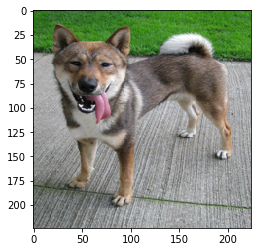

In [4]:
size = 224, 224
label = ['cat', 'dog']

dog_path = 'data/catsndogs/validation/dog/035.1153229.JPG'
dog = Image.open(dog_path).resize(size, resample=Image.BICUBIC)

dog_data = np.array(dog) / 255.
plt.imshow(dog)
p = model.predict(np.expand_dims(dog_data, axis=0))[0]
print('Looks like a', label[np.argmax(p)])
print(p)

Looks like a cat
[0.8598885  0.14011154]


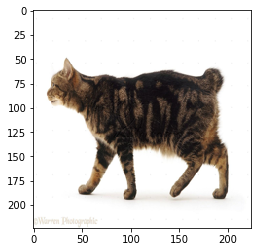

In [5]:
cat_path = 'data/catsndogs/validation/cat/5_manx_cat.jpg'
cat = Image.open(cat_path).resize(size, resample=Image.BICUBIC)

cat_data = np.array(cat) / 255.
plt.imshow(cat)
p = model.predict(np.expand_dims(cat_data, axis=0))[0]
print('Looks like a', label[np.argmax(p)])
print(p)

In [5]:
# swap prediction layer activation to linear
# to generate attention map
layer_idx = utils.find_layer_idx(model, 'prediction')
model.layers[layer_idx].activation = activations.linear
model.save('temp.h5')
model = load_model('temp.h5')
os.remove('temp.h5')